# Analiza wydajności metod mnożenia macierzy

1. Naiwna metoda (potrójne pętle w naturalnej kolejności)
2. Ulepszona metoda (ze zamienioną kolejnością pętli)
3. Implementacja z użyciem BLAS (poprzez GSL)


In [2]:
using DataFrames
using CSV
using Plots
using Statistics

## Wczytanie danych z pliku CSV

Najpierw wczytamy dane wygenerowane przez program w C:

In [3]:
# Wczytanie danych bez optymalizacji kompilatora
df_no_opt = CSV.read("results_no_opt.csv", DataFrame)
println("Dane bez optymalizacji:")
df_no_opt

Dane bez optymalizacji:


Row,Rozmiar,Naiwna,Ulepszona,BLAS
,Int64,Float64,Float64,Float64
1,100,0.004541,0.002606,0.000677
2,200,0.031355,0.01756,0.003454
3,300,0.094823,0.055652,0.010033
4,400,0.221726,0.132294,0.025214
5,500,0.439659,0.267937,0.055307
6,600,0.756781,0.457692,0.098799
7,700,1.27884,0.752967,0.156128
8,800,1.81665,1.59775,0.237704
9,900,2.60951,1.73558,0.395192


In [4]:
df_opt = CSV.read("results_opt.csv", DataFrame)
println("Dane z optymalizacją:")
df_opt

Dane z optymalizacją:


Row,Rozmiar,Naiwna,Ulepszona,BLAS
,Int64,Float64,Float64,Float64
1,100,0.000708,0.000382,0.000368
2,200,0.006236,0.003153,0.00337
3,300,0.025538,0.009648,0.010189
4,400,0.066785,0.026633,0.024858
5,500,0.135856,0.058439,0.059695
6,600,0.240642,0.108105,0.098788
7,700,0.393685,0.182351,0.161996
8,800,0.60284,0.877626,0.258927
9,900,0.888804,0.411985,0.346096


## Wizualizacja wyników bez optymalizacji kompilatora

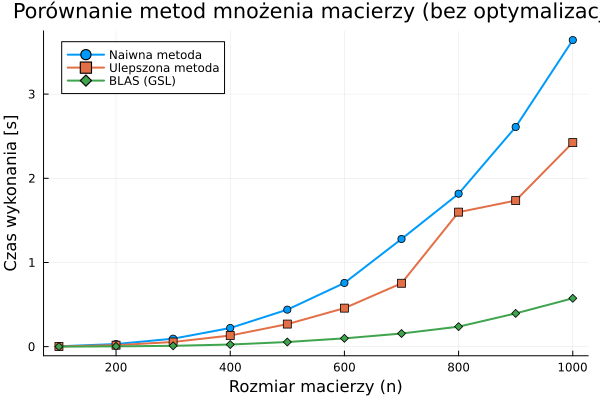

In [5]:
p1 = plot(df_no_opt.Rozmiar, df_no_opt.Naiwna, 
    label="Naiwna metoda", 
    xlabel="Rozmiar macierzy (n)", 
    ylabel="Czas wykonania [s]",
    title="Porównanie metod mnożenia macierzy (bez optymalizacji)",
    lw=2, marker=:circle, markersize=4)

plot!(p1, df_no_opt.Rozmiar, df_no_opt.Ulepszona, 
    label="Ulepszona metoda", 
    lw=2, marker=:square, markersize=4)

plot!(p1, df_no_opt.Rozmiar, df_no_opt.BLAS, 
    label="BLAS (GSL)", 
    lw=2, marker=:diamond, markersize=4)

display(p1)

## Analiza przyspieszenia względem naiwnej metody

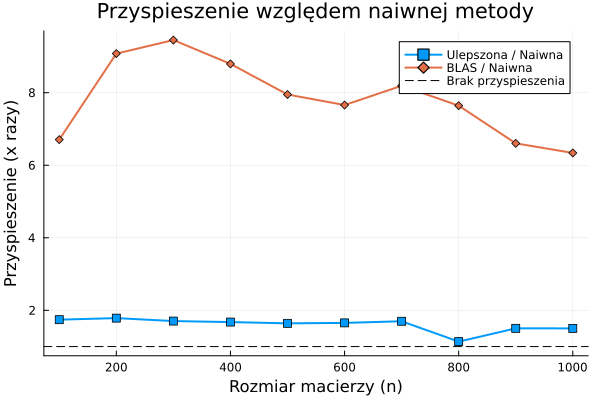

In [6]:
df_no_opt[!, :Przyspieszenie_Ulepszona] = df_no_opt.Naiwna ./ df_no_opt.Ulepszona
df_no_opt[!, :Przyspieszenie_BLAS] = df_no_opt.Naiwna ./ df_no_opt.BLAS

p2 = plot(df_no_opt.Rozmiar, df_no_opt.Przyspieszenie_Ulepszona, 
    label="Ulepszona / Naiwna", 
    xlabel="Rozmiar macierzy (n)", 
    ylabel="Przyspieszenie (x razy)",
    title="Przyspieszenie względem naiwnej metody",
    lw=2, marker=:square, markersize=4)

plot!(p2, df_no_opt.Rozmiar, df_no_opt.Przyspieszenie_BLAS, 
    label="BLAS / Naiwna", 
    lw=2, marker=:diamond, markersize=4)

hline!(p2, [1.0], label="Brak przyspieszenia", ls=:dash, color=:black)

display(p2)

## Porównanie z optymalizacją kompilatora (dla chętnych)

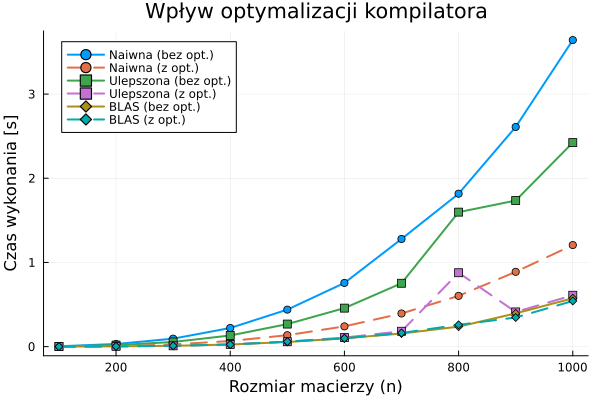

In [7]:
p3 = plot(title="Wpływ optymalizacji kompilatora", xlabel="Rozmiar macierzy (n)", ylabel="Czas wykonania [s]")

# Naiwna metoda
plot!(p3, df_no_opt.Rozmiar, df_no_opt.Naiwna, label="Naiwna (bez opt.)", lw=2, marker=:circle, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.Naiwna, label="Naiwna (z opt.)", lw=2, ls=:dash, marker=:circle, markersize=4)

# Ulepszona metoda
plot!(p3, df_no_opt.Rozmiar, df_no_opt.Ulepszona, label="Ulepszona (bez opt.)", lw=2, marker=:square, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.Ulepszona, label="Ulepszona (z opt.)", lw=2, ls=:dash, marker=:square, markersize=4)

# BLAS
plot!(p3, df_no_opt.Rozmiar, df_no_opt.BLAS, label="BLAS (bez opt.)", lw=2, marker=:diamond, markersize=4)
plot!(p3, df_opt.Rozmiar, df_opt.BLAS, label="BLAS (z opt.)", lw=2, ls=:dash, marker=:diamond, markersize=4)

display(p3)